# Business Understanding

## Project Domain

Domain: Agriculture & Precision Farming
Sub-Domain: Smart Farming & Decision Support Systems

Sistem rekomendasi tanaman (Crop Recommendation System) termasuk dalam bidang pertanian presisi (precision agriculture) yang memanfaatkan data science dan machine learning untuk membantu petani memilih tanaman yang paling sesuai berdasarkan kondisi tanah dan iklim.

## Problem Statements

Masalah yang Dihadapi:
1. Ketidaktepatan Pemilihan Tanaman
  * Petani sering memilih tanaman berdasarkan pengalaman tradisional tanpa mempertimbangkan data ilmiah tentang kondisi tanah dan iklim.
  * Hal ini dapat menyebabkan hasil panen tidak optimal atau bahkan gagal.

2. Ketergantungan pada Ahli Pertanian
  * Konsultasi dengan ahli agronomi membutuhkan biaya dan waktu yang tidak selalu terjangkau oleh petani kecil.

3. Perubahan Iklim yang Tidak Terduga
  * Perubahan cuaca ekstrem memengaruhi produktivitas tanaman, sehingga diperlukan prediksi berbasis data.
4. Pemanfaatan Lahan yang Tidak Optimal
  * Tanah dengan kandungan nutrisi berbeda membutuhkan tanaman yang berbeda, tetapi petani sering menanam satu jenis tanaman secara terus-menerus, menyebabkan degradasi tanah.

## Goals

Membangun sistem berbasis AI (Artificial Neural Network) yang dapat merekomendasikan tanaman terbaik berdasarkan parameter:
1. Kondisi Tanah (Nitrogen, Phosphorus, Potassium, pH)
2. Kondisi Iklim (Suhu, Kelembaban, Curah Hujan)

## Solustion Statements

* Machine Learning Model
Menggunakan Artificial Neural Network (ANN) untuk klasifikasi tanaman berdasarkan dataset parameter tanah dan iklim.
Model dilatih untuk memprediksi tanaman dengan akurasi tinggi (>90%).

* Aplikasi Web (Streamlit)
Membuat antarmuka yang mudah digunakan bagi petani untuk memasukkan parameter tanah dan mendapatkan rekomendasi instan.

* Optimasi dengan TensorFlow Lite
Model dikonversi ke format TFLite agar ringan dan bisa dijalankan di perangkat dengan sumber daya terbatas.

# Data Understanding

## Import Data dari Kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yusufar28","key":"be88aa03e4d1abf8f2d4a38d5c95462a"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d simaanjali/diabetes-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/simaanjali/diabetes-classification-dataset
License(s): CC0-1.0
  0% 0.00/76.8k [00:00<?, ?B/s]
100% 76.8k/76.8k [00:00<00:00, 235MB/s]


In [4]:
!mkdir diabetes-classification-dataset
!unzip diabetes-classification-dataset -d diabetes-classification-dataset
!ls diabetes-classification-dataset

Archive:  diabetes-classification-dataset.zip
  inflating: diabetes-classification-dataset/Diabetes Classification.csv  
'Diabetes Classification.csv'


## Import Library yang dibutuhkan

In [49]:
# === Data Handling & Visualization ===
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# === Preprocessing ===
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler


# === Evaluation Metrics ===
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix

# === TensorFlow / Keras for Modeling ===
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


## Exploratory Data Analysis

In [12]:
df = pd.read_csv('diabetes-classification-dataset/Diabetes Classification.csv')

In [13]:
df.head()

,Unnamed: 0,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,0,50,F,24,4.2,0.9,2.4,1.4,46.0,4.7,0
1,1,26,M,23,3.7,1.4,1.1,2.1,62.0,4.5,0
2,2,33,M,21,4.9,1.0,0.8,2.0,46.0,7.1,0
3,3,45,F,21,2.9,1.0,1.0,1.5,24.0,2.3,0
4,4,50,F,24,3.6,1.3,0.9,2.1,50.0,2.0,0


In [15]:
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

In [16]:
sns.set(style="whitegrid")

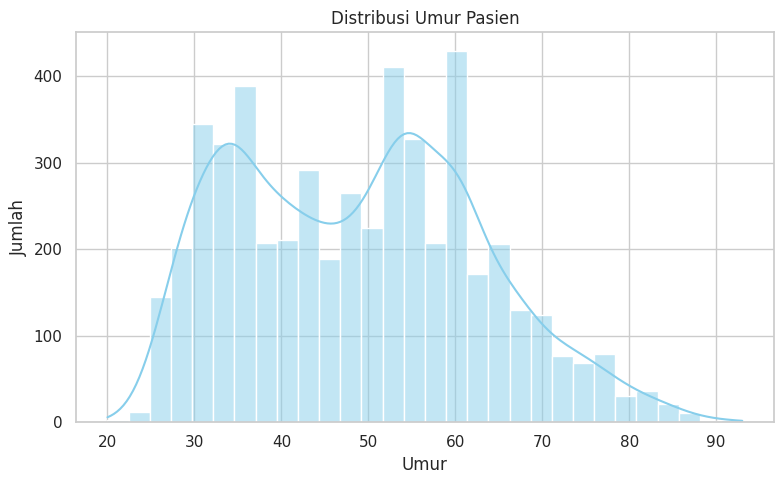

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=30, kde=True, color="skyblue")
plt.title("Distribusi Umur Pasien")
plt.xlabel("Umur")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()


<ipython-input-18-3563676393>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Diagnosis", y="BMI", palette="Set2")


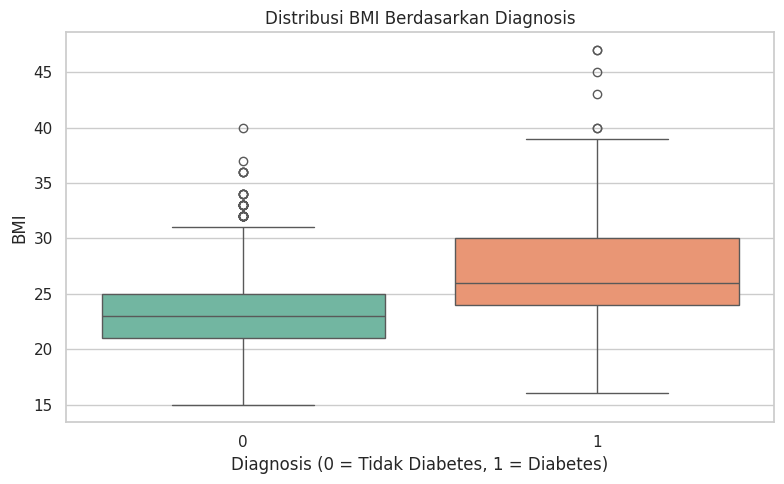

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Diagnosis", y="BMI", palette="Set2")
plt.title("Distribusi BMI Berdasarkan Diagnosis")
plt.xlabel("Diagnosis (0 = Tidak Diabetes, 1 = Diabetes)")
plt.ylabel("BMI")
plt.tight_layout()
plt.show()


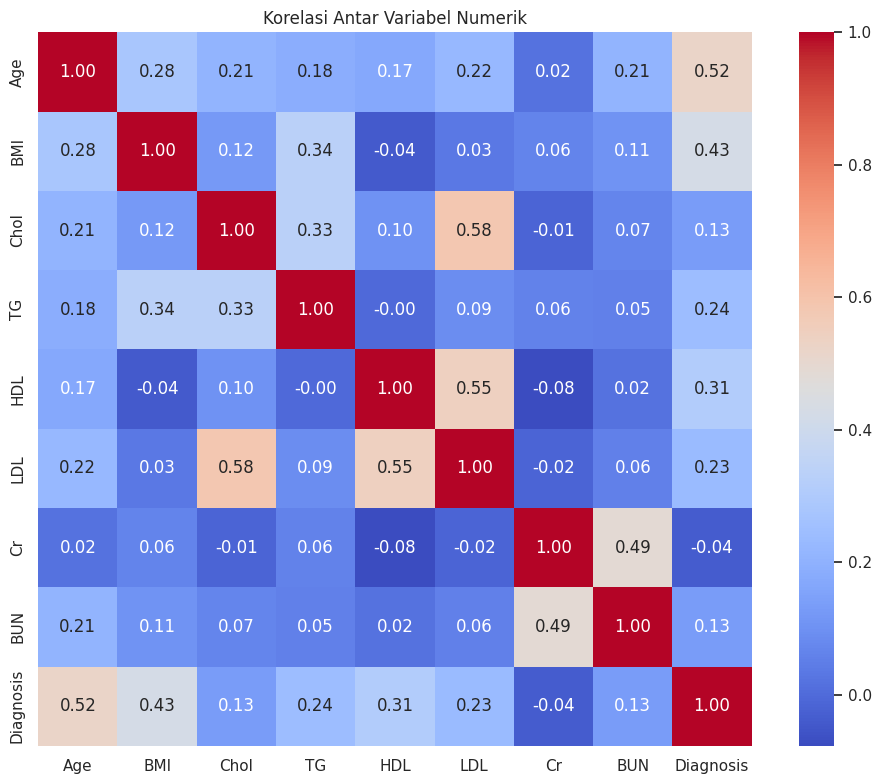

In [19]:
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Korelasi Antar Variabel Numerik")
plt.tight_layout()
plt.show()


<ipython-input-20-831968469>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Gender", palette="pastel")


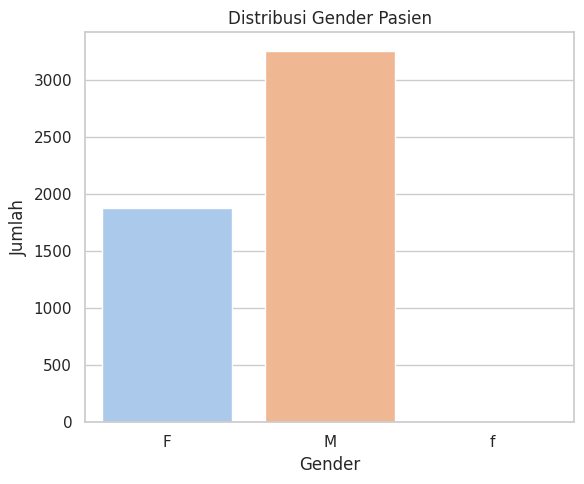

In [20]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x="Gender", palette="pastel")
plt.title("Distribusi Gender Pasien")
plt.xlabel("Gender")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()


<ipython-input-22-4005771605>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Diagnosis", y="Chol", ci=None, palette="muted")
<ipython-input-22-4005771605>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Diagnosis", y="Chol", ci=None, palette="muted")


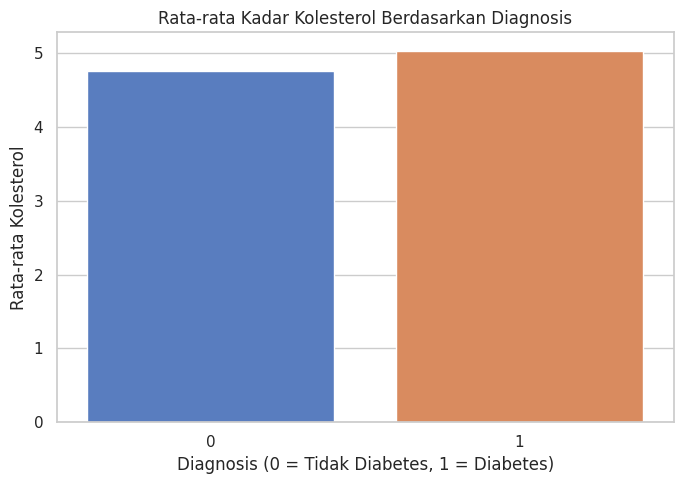

In [22]:
plt.figure(figsize=(7, 5))
sns.barplot(data=df, x="Diagnosis", y="Chol", ci=None, palette="muted")
plt.title("Rata-rata Kadar Kolesterol Berdasarkan Diagnosis")
plt.xlabel("Diagnosis (0 = Tidak Diabetes, 1 = Diabetes)")
plt.ylabel("Rata-rata Kolesterol")
plt.tight_layout()
plt.show()


# Data Preparation

In [29]:
# Load data
df = pd.read_csv("/content/diabetes-classification-dataset/Diabetes Classification.csv")

# Hapus kolom indeks jika ada
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])


In [30]:
# One-hot encoding untuk gender
df = pd.get_dummies(df, columns=["Gender"], drop_first=True)

In [32]:
# Pisahkan fitur dan target
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


# Modeling

In [39]:
model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [41]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)


Epoch 1/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4664 - loss: 0.7073 - val_accuracy: 0.7259 - val_loss: 0.5793
Epoch 2/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7413 - loss: 0.5479 - val_accuracy: 0.7674 - val_loss: 0.4890
Epoch 3/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7821 - loss: 0.4567 - val_accuracy: 0.7929 - val_loss: 0.4311
Epoch 4/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8110 - loss: 0.4162 - val_accuracy: 0.8076 - val_loss: 0.4063
Epoch 5/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8178 - loss: 0.3910 - val_accuracy: 0.8124 - val_loss: 0.3972
Epoch 6/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8187 - loss: 0.3749 - val_accuracy: 0.8136 - val_loss: 0.3919
Epoch 7/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8300 - loss: 0.3620 - val_accuracy: 0.8100 - val_loss: 0.3877
Epoch 8/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8300 - loss: 0.3581 - val_accuracy: 0.

# Evaluation

In [43]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Akurasi Model: {accuracy * 100:.2f}%")


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8250 - loss: 0.3627
Akurasi Model: 83.25%


In [50]:


y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Confusion Matrix:
 [[542  86]
 [ 86 313]]


In [52]:


print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.86      0.86       628
           1       0.78      0.78      0.78       399

    accuracy                           0.83      1027
   macro avg       0.82      0.82      0.82      1027
weighted avg       0.83      0.83      0.83      1027



# Deployment

## Model Simulation

## Save Model

In [53]:
# Konversi ke .tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Saved artifact at '/tmp/tmpnmb16yx8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 10), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140128092929296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140128092929872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140128092927184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140128092926992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140128092929488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140128092927568: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [54]:
# Simpan file .tflite
with open("model_diabetes.tflite", "wb") as f:
    f.write(tflite_model)

print("Model berhasil dikonversi dan disimpan sebagai model_diabetes.tflite")

Model berhasil dikonversi dan disimpan sebagai model_diabetes.tflite
